## Please, fill in before you start:

First Name: Tajamul

Last Name: Sheikh

Group: ИИАД22

### After the assigment is done, please, push it to a [private GitHub repository](https://docs.github.com/en/github/administering-a-repository/managing-repository-settings/setting-repository-visibility) and invite [Majid-Sohrabi](https://github.com/Majid-Sohrabi), [abdalazizrashid](https://github.com/abdalazizrashid) [as collaborators](https://docs.github.com/en/account-and-profile/setting-up-and-managing-your-github-user-account/managing-access-to-your-personal-repositories/inviting-collaborators-to-a-personal-repository).

Get the Titanic dataset:

In [ ]:
!wget https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv

--2023-10-10 19:17:18--  https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv.2’

train.csv.2         100%[===================>]  58.89K  --.-KB/s    in 0.002s  

2023-10-10 19:17:18 (23.4 MB/s) - ‘train.csv.2’ saved [60302/60302]



In [ ]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

## Task 1 (1 point)

In [ ]:
# Compute survival rate for each of the three passenger classes (`Pclass` = 1, 2 and 3)
# (can you do it using groupby?)

# <YOUR CODE>
survival_rate = data.groupby('Pclass')['Survived'].mean()
survival_rate


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

## Task 2 (1 point)

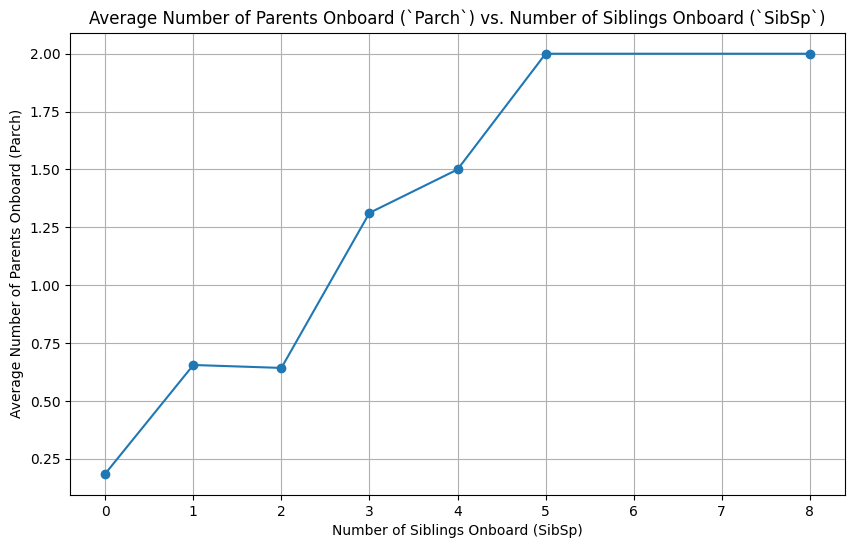

In [ ]:
# Plot the average number of parents onboard (`Parch`) as a function of the
# number of siblings onboard (`SibSp`)

import matplotlib.pyplot as plt

# <YOUR CODE>
average_parch_by_sibsp = data.groupby('SibSp')['Parch'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_parch_by_sibsp.index, average_parch_by_sibsp.values, marker='o', linestyle='-')
plt.title('Average Number of Parents Onboard (`Parch`) vs. Number of Siblings Onboard (`SibSp`)')
plt.xlabel('Number of Siblings Onboard (SibSp)')
plt.ylabel('Average Number of Parents Onboard (Parch)')
plt.grid(True)
plt.show()


[link text](https://)## Task 3 (2 points)

In [ ]:
# Build a model with KNeighborsClassifier to get the accuracy of
# at least 0.75 on the validation part of the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler

def feature_selection_and_preprocessing(dataset):

    # Feature selection
    features = dataset[["Fare", "Parch", "Age", "Sex", "Pclass"]].copy()

    # impute missing ages
    features["Age"].fillna(features["Age"].mean(), inplace=True)

    # using one-hot encoding
    features = pd.get_dummies(features, columns=["Sex", "Pclass"], drop_first=True)

    # Feature scaling for 'Fare' and 'Age'
    features["Fare"] /= features["Fare"].mean()
    features["Age"] /= features["Age"].mean()

    return features

"""model = KNeighborsClassifier(
    n_neighbors=11,  # After Experimenting with diff values, 11 gave the highest accuracy as 86%
    weights='distance',
    metric='euclidean',
    p=2
)"""

model = KNeighborsClassifier(
    n_neighbors=9,  # # After Experimenting with diff values, 9 gave the highest accuracy as 86%
    weights='distance',
    metric='manhattan',
    p=1  # Using p=1 for manhattan distance
)



# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.86


## Task 4 (2 points)

Check how your model from the previous task performs on randomized splits to train / test (with test set of size 100). Plot the histogram of the test error distribution.

*Hint: check sklearn's `sklearn.model_selection.train_test_split` function.*

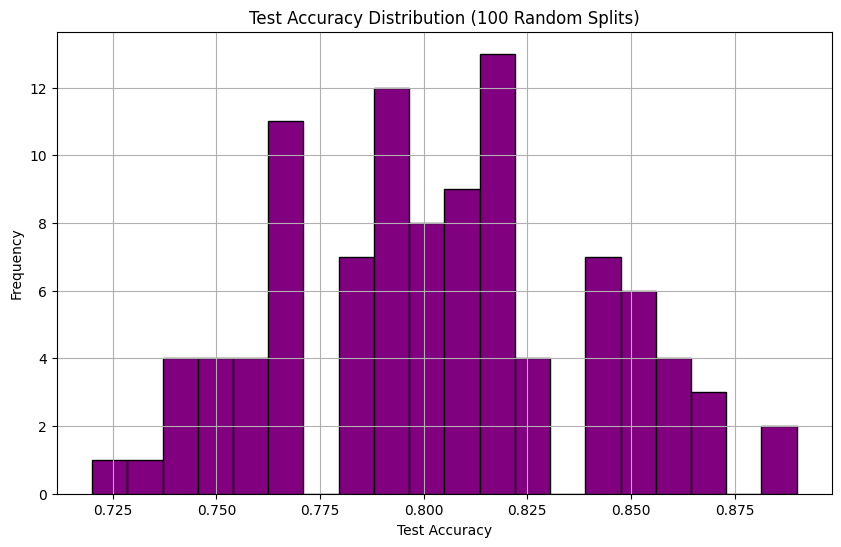

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# <YOUR CODE>
test_accuracies = []

# Number of random splits
num_splits = 100

for _ in range(num_splits):
    data_train, data_test = train_test_split(data, test_size=100, random_state=None)
    X_train, y_train = data_train.drop('Survived', axis=1), data_train['Survived']
    X_test, y_test = data_test.drop('Survived', axis=1), data_test['Survived']

    # Feature selection and preprocessing on the training data
    X_train = feature_selection_and_preprocessing(X_train)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Feature selection and preprocessing on the test data
    X_test = feature_selection_and_preprocessing(X_test)

    # Make predictions on the test data
    test_predictions = model.predict(X_test)

    # Calculate the test accuracy and store it
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_accuracies.append(test_accuracy)


plt.figure(figsize=(10, 6))
plt.hist(test_accuracies, bins=20, edgecolor='k', color='purple')
plt.title('Test Accuracy Distribution ({} Random Splits)'.format(num_splits))
plt.xlabel('Test Accuracy')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

